## Import packages

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

## Data

In [6]:
diabetes = load_diabetes()

In [7]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [21]:
print(diabetes.DESCR[:548])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline


In [23]:
print(diabetes.data.shape)
print(diabetes.feature_names)

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [24]:
print(diabetes['target'].shape)
print(diabetes['target'][:10])

(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [27]:
print(diabetes['data'][:10,:6])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438]
 [ 0.04170844  0.05068012  0.06169621 -0.04009893 -0.01395254  0.00620169]
 [-0.07090025 -0.04464164  0.03906215 -0.03321323 -0.01257658 -0.03450761]]


## Linear Regression (OLS)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=42)

In [30]:
lr = LinearRegression().fit(X_train, y_train)

Coefficients and Intercept

In [31]:
print(f'Coefficients:\n{lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients:
[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
Intercept: 151.6651755919933


In [32]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Training set score: 0.52
Test set score: 0.48


## Feature Engineering

2nd order features

In [49]:
poly = PolynomialFeatures(degree=2, include_bias=False)
diabetes_data_2nd_order = poly.fit_transform(diabetes['data'])
print(f"Shape of original data: {diabetes['data'].shape}")
print(f"Shape of 2nd order features: {diabetes_data_2nd_order.shape}")

Shape of original data: (442, 10)
Shape of 2nd order features: (442, 65)


## Model Performance using 2nd order features

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(diabetes_data_2nd_order, diabetes['target'], random_state=42)

In [51]:
lr2 = LinearRegression().fit(X_train2, y_train2)

In [52]:
print(f'2nd order Training set score: {lr2.score(X_train2, y_train2):.2f}')
print(f'2nd order Test set score: {lr2.score(X_test2, y_test2):.2f}')

2nd order Training set score: 0.60
2nd order Test set score: 0.42


## Ridge Regression

In [53]:
ridge = Ridge().fit(X_train2, y_train2)
print('Ridge Model scores:')
print("Training set score: {:.2f}".format(ridge.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(ridge.score(X_test2, y_test2)))

Ridge Model scores:
Training set score: 0.43
Test set score: 0.44


ridge with alpha value as 0.1

In [58]:
ridge01 = Ridge(alpha=0.1).fit(X_train2, y_train2)
print('Ridge Model scores with alpha 0.1:')
print("Training set score: {:.2f}".format(ridge01.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(ridge01.score(X_test2, y_test2)))

Ridge Model scores with alpha 0.1:
Training set score: 0.51
Test set score: 0.50


Ridge Model scores with alpha 0.05:

Training set score: 0.52
Test set score: 0.50

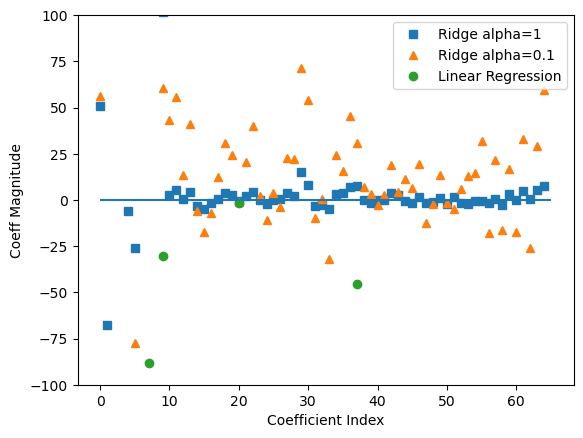

In [63]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')
plt.plot(lr2.coef_, 'o', label='Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coeff Magnitude')
plt.hlines(0,0,len(lr2.coef_))
plt.ylim(-100,100)
plt.legend()

## Lasso

In [65]:
lasso = Lasso().fit(X_train2, y_train2)
print("Training set score: {:.2f}".format(lasso.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lasso.score(X_test2, y_test2)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.35
Test set score: 0.38
Number of features used: 3


Lasso with alpha 0.1

In [68]:
lasso01 = Lasso(alpha=0.1, max_iter=10000).fit(X_train2, y_train2)
print("Training set score: {:.2f}".format(lasso01.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lasso01.score(X_test2, y_test2)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.51
Test set score: 0.50
Number of features used: 7


Alpha 0.01:

Training set score: 0.54
Test set score: 0.51
Number of features used: 16

Selected features with alpha=0.1

In [72]:
original_feature_names = diabetes['feature_names']
poly_feature_names = poly.get_feature_names_out(original_feature_names)

selected_features = [name for coef, name in zip(lasso01.coef_, poly_feature_names) if coef != 0]

print("Selected features with non-zero coefficients:")
print(selected_features)

Selected features with non-zero coefficients:
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']
